#### Load the dataset

In [30]:
# Import the pandas, numpy packages and dump from joblib
import pandas as pd
import numpy as np
from joblib import dump

In [31]:
# Load the saved sets from data/processed using numpy
X_train = np.load('../data/processed/X_train.npy')
X_val   = np.load('../data/processed/X_val.npy'  )
# X_test  = np.load('../data/processed/X_test.npy' )
y_train = np.load('../data/processed/y_train.npy')
y_val   = np.load('../data/processed/y_val.npy'  )
# y_test  = np.load('../data/processed/y_test.npy' )

#### Train Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

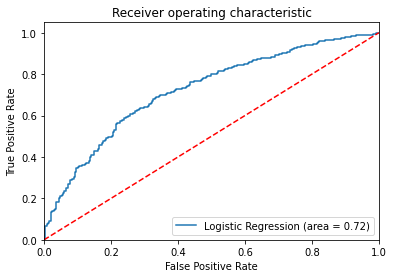

In [35]:
logit_roc_auc = roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1])
fpr, tpr, thresholds = roc_curve(y_val, logreg.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [36]:
roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])

0.6972839547004431

In [37]:
roc_auc_score(y_val, logreg.predict_proba(X_val)[:,1])

0.7228785507944151